In [1]:
import pandas as pd
import numpy as np

In [2]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [3]:
train=pd.read_csv("../input/amexpert/dataset/train.csv").drop('customer_id', axis=1)
train=train.fillna(0.5)
train= reduce_memory_usage(train)
test=pd.read_csv("../input/amexpert/dataset/test.csv").fillna(1)
cust=test['customer_id']
test=test.drop('customer_id', axis=1)
test = reduce_memory_usage(test)
submission=pd.read_csv("../input/amexpert/dataset/sample_submission.csv").drop('customer_id', axis=1)
submission.dropna(inplace=True)
submission = reduce_memory_usage(submission)

Mem. usage decreased to 3.00 Mb (52.1% reduction)
Mem. usage decreased to 0.74 Mb (50.0% reduction)
Mem. usage decreased to 0.00 Mb (43.8% reduction)


In [4]:
#test.fillna(0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     11383 non-null  object 
 1   age                      11383 non-null  int8   
 2   gender                   11383 non-null  object 
 3   owns_car                 11383 non-null  object 
 4   owns_house               11383 non-null  object 
 5   no_of_children           11383 non-null  float16
 6   net_yearly_income        11383 non-null  float32
 7   no_of_days_employed      11383 non-null  float32
 8   occupation_type          11383 non-null  object 
 9   total_family_members     11383 non-null  float16
 10  migrant_worker           11383 non-null  float16
 11  yearly_debt_payments     11383 non-null  float32
 12  credit_limit             11383 non-null  float32
 13  credit_limit_used(%)     11383 non-null  int8   
 14  credit_score          

In [5]:
print(train.shape)
print(train.columns)
train.head()

(45528, 18)
Index(['name', 'age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')


,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,ita Bose,46,F,N,Y,0.0,107934.039062,612.0,Unknown,1.0,1.0,33070.281250,18690.929688,73,544.0,2,1,1
1,Alper Jonathan,29,M,N,Y,0.0,109862.617188,2771.0,Laborers,2.0,0.0,15329.530273,37745.191406,52,857.0,0,0,0
2,Umesh Desai,37,M,N,Y,0.0,230153.171875,204.0,Laborers,2.0,0.0,48416.601562,41598.359375,43,650.0,0,0,0
3,Rie,39,F,N,Y,0.0,122325.820312,11941.0,Core staff,2.0,0.0,22574.359375,32627.759766,20,754.0,0,0,0
4,McCool,46,M,Y,Y,0.0,387286.000000,1459.0,Core staff,1.0,0.0,38282.949219,52950.640625,75,927.0,0,0,0


In [6]:
print(test.shape)
print(test.columns)
test.head()

(11383, 17)
Index(['name', 'age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months'],
      dtype='object')


,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,Siva,52,F,Y,N,0.0,232640.531250,998.0,Unknown,2.0,0.0,14406.730469,26524.400391,4,779.0,0,0
1,Scott,48,F,N,N,1.0,284396.781250,1338.0,Unknown,3.0,0.0,57479.988281,68998.718750,70,806.0,0,0
2,Victoria,50,F,N,N,1.0,149419.281250,1210.0,Unknown,3.0,0.0,21611.009766,25187.800781,71,528.0,2,0
3,John McCrank,30,F,N,N,1.0,160437.546875,503.0,Laborers,2.0,1.0,28990.759766,29179.390625,9,815.0,0,0
4,Martinne,52,M,N,Y,0.0,233480.375000,157.0,Laborers,2.0,1.0,54213.718750,82331.820312,82,613.0,1,1


In [7]:
train.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,ita Bose,46,F,N,Y,0.0,107934.039062,612.0,Unknown,1.0,1.0,33070.281250,18690.929688,73,544.0,2,1,1
1,Alper Jonathan,29,M,N,Y,0.0,109862.617188,2771.0,Laborers,2.0,0.0,15329.530273,37745.191406,52,857.0,0,0,0
2,Umesh Desai,37,M,N,Y,0.0,230153.171875,204.0,Laborers,2.0,0.0,48416.601562,41598.359375,43,650.0,0,0,0
3,Rie,39,F,N,Y,0.0,122325.820312,11941.0,Core staff,2.0,0.0,22574.359375,32627.759766,20,754.0,0,0,0
4,McCool,46,M,Y,Y,0.0,387286.000000,1459.0,Core staff,1.0,0.0,38282.949219,52950.640625,75,927.0,0,0,0


In [8]:
test.head()

,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,Siva,52,F,Y,N,0.0,232640.531250,998.0,Unknown,2.0,0.0,14406.730469,26524.400391,4,779.0,0,0
1,Scott,48,F,N,N,1.0,284396.781250,1338.0,Unknown,3.0,0.0,57479.988281,68998.718750,70,806.0,0,0
2,Victoria,50,F,N,N,1.0,149419.281250,1210.0,Unknown,3.0,0.0,21611.009766,25187.800781,71,528.0,2,0
3,John McCrank,30,F,N,N,1.0,160437.546875,503.0,Laborers,2.0,1.0,28990.759766,29179.390625,9,815.0,0,0
4,Martinne,52,M,N,Y,0.0,233480.375000,157.0,Laborers,2.0,1.0,54213.718750,82331.820312,82,613.0,1,1


In [9]:
train.isnull().sum()

name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [10]:
train['gender'].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [11]:
train['owns_car'].isnull().sum()

0

In [12]:
train['owns_car'].value_counts()

N      29743
Y      15238
0.5      547
Name: owns_car, dtype: int64

In [13]:
train['owns_house'].value_counts()

Y    31642
N    13886
Name: owns_house, dtype: int64

In [14]:
from sklearn import preprocessing
def Cleandata(data):
  data.drop(['name','occupation_type'], axis=1, inplace=True)
  data['gender'].replace({'M':0, 'F':1, 'XNA':-1}, inplace=True)
  data['owns_car'].replace({'N':0, 'Y':1}, inplace=True)
  data['owns_house'].replace({'Y':0, 'N':1}, inplace=True)
  return data

<AxesSubplot:>

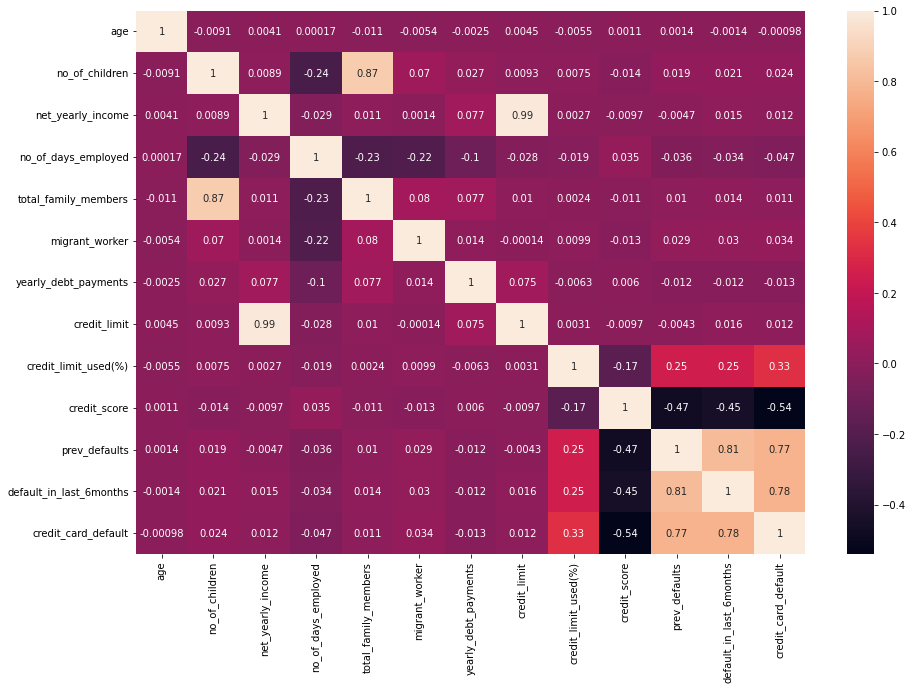

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_card_default', ylabel='default_in_last_6months'>

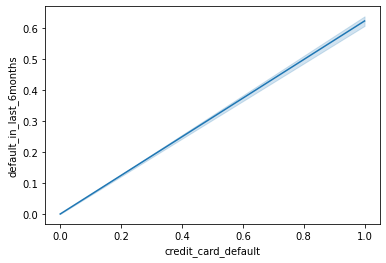

In [16]:
sns.lineplot( train['credit_card_default'], train['default_in_last_6months'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_card_default', ylabel='prev_defaults'>

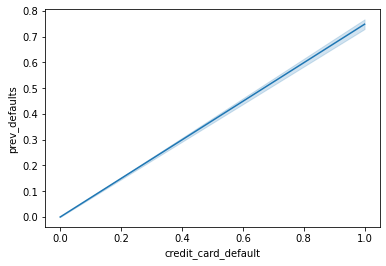

In [17]:
sns.lineplot( train['credit_card_default'], train['prev_defaults'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='prev_defaults', ylabel='default_in_last_6months'>

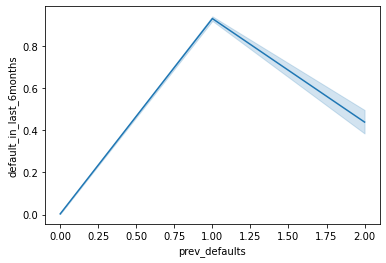

In [18]:
sns.lineplot( train['prev_defaults'], train['default_in_last_6months'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='no_of_children', ylabel='migrant_worker'>

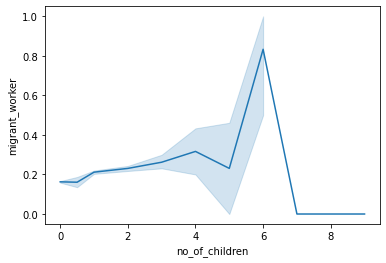

In [19]:
sns.lineplot( train['no_of_children'], train['migrant_worker'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_family_members', ylabel='no_of_children'>

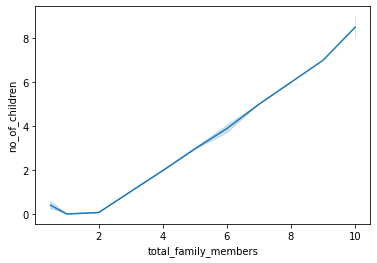

In [20]:
sns.lineplot( train['total_family_members'], train['no_of_children'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='credit_limit', ylabel='net_yearly_income'>

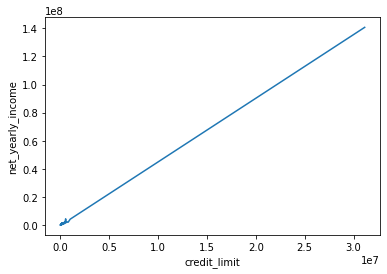

In [21]:
sns.lineplot( train['credit_limit'], train['net_yearly_income'])

In [22]:
cleantrain= Cleandata(train)
cleantest= Cleandata(test)

In [23]:
cleantrain.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,1,0.0,0,0.0,107934.039062,612.0,1.0,1.0,33070.281250,18690.929688,73,544.0,2,1,1
1,29,0,0.0,0,0.0,109862.617188,2771.0,2.0,0.0,15329.530273,37745.191406,52,857.0,0,0,0
2,37,0,0.0,0,0.0,230153.171875,204.0,2.0,0.0,48416.601562,41598.359375,43,650.0,0,0,0
3,39,1,0.0,0,0.0,122325.820312,11941.0,2.0,0.0,22574.359375,32627.759766,20,754.0,0,0,0
4,46,0,1.0,0,0.0,387286.000000,1459.0,1.0,0.0,38282.949219,52950.640625,75,927.0,0,0,0


In [24]:
cleantrain.round(0)
#cleantest.astype('int', errors='ignore')

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,1,0.0,0,0.0,107934.0,612.0,1.0,1.0,33070.0,18691.0,73,544.0,2,1,1
1,29,0,0.0,0,0.0,109863.0,2771.0,2.0,0.0,15330.0,37745.0,52,857.0,0,0,0
2,37,0,0.0,0,0.0,230153.0,204.0,2.0,0.0,48417.0,41598.0,43,650.0,0,0,0
3,39,1,0.0,0,0.0,122326.0,11941.0,2.0,0.0,22574.0,32628.0,20,754.0,0,0,0
4,46,0,1.0,0,0.0,387286.0,1459.0,1.0,0.0,38283.0,52951.0,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,55,1,0.0,1,2.0,96208.0,117.0,4.0,0.0,11230.0,29664.0,82,907.0,0,0,0
45524,31,1,0.0,0,0.0,383477.0,966.0,2.0,1.0,43370.0,139947.0,32,679.0,0,0,0
45525,27,1,0.0,0,0.0,260052.0,1420.0,2.0,0.0,22708.0,83962.0,46,727.0,0,0,0
45526,32,0,1.0,1,0.0,157363.0,2457.0,2.0,0.0,20150.0,25539.0,92,805.0,0,0,0


In [25]:
cleantest.round(0)

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,52,1,1,1,0.0,232641.0,998.0,2.0,0.0,14407.0,26524.0,4,779.0,0,0
1,48,1,0,1,1.0,284397.0,1338.0,3.0,0.0,57480.0,68999.0,70,806.0,0,0
2,50,1,0,1,1.0,149419.0,1210.0,3.0,0.0,21611.0,25188.0,71,528.0,2,0
3,30,1,0,1,1.0,160438.0,503.0,2.0,1.0,28991.0,29179.0,9,815.0,0,0
4,52,0,0,0,0.0,233480.0,157.0,2.0,1.0,54214.0,82332.0,82,613.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,53,1,0,1,0.0,266824.0,3051.0,1.0,0.0,17792.0,64484.0,74,823.0,0,0
11379,33,1,1,1,0.0,124311.0,365248.0,1.0,0.0,26577.0,29852.0,60,712.0,0,0
11380,27,0,1,0,1.0,364653.0,3431.0,3.0,0.0,28659.0,69337.0,67,674.0,0,0
11381,36,1,0,0,0.0,128769.0,16320.0,1.0,0.0,11527.0,26908.0,17,684.0,0,0


In [26]:
cleantrain.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,1,0.0,0,0.0,107934.039062,612.0,1.0,1.0,33070.281250,18690.929688,73,544.0,2,1,1
1,29,0,0.0,0,0.0,109862.617188,2771.0,2.0,0.0,15329.530273,37745.191406,52,857.0,0,0,0
2,37,0,0.0,0,0.0,230153.171875,204.0,2.0,0.0,48416.601562,41598.359375,43,650.0,0,0,0
3,39,1,0.0,0,0.0,122325.820312,11941.0,2.0,0.0,22574.359375,32627.759766,20,754.0,0,0,0
4,46,0,1.0,0,0.0,387286.000000,1459.0,1.0,0.0,38282.949219,52950.640625,75,927.0,0,0,0


In [27]:
y = cleantrain['credit_card_default']
#cleantrain.drop(['customer_id','name','occupation_type','credit_card_default'], axis=1, inplace=True)
X = pd.get_dummies(cleantrain.drop('credit_card_default', axis=1))
from sklearn.model_selection import train_test_split
# Split model train test data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.4, random_state=42)

In [28]:
def fitAndPredict(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return accuracy_score(y_val, prediction)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(min_samples_split=11, min_samples_leaf=3, max_depth=3, max_features=7)
fitAndPredict(model)

0.9808368108939161

In [30]:
#cleantest.drop(['customer_id','name','occupation_type'],axis=1,inplace=True)
#cleantest.fillna(cleantest.mean())
#cleantest = cleantest.fillna(lambda x: x.median())
#cleantest= cleantest.astype(int)
predict = model.predict(cleantest)
output = pd.DataFrame({'customer_id':cust,'credit_card_default': predict})
output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved


In [31]:
output.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [32]:
output.shape

(11383, 2)

In [33]:
output

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1
...,...,...
11378,CST_142412,0
11379,CST_107967,0
11380,CST_134002,0
11381,CST_146856,0
